In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad

In [2]:
sc.settings.set_figure_params(dpi=80, facecolor='white', frameon=True, figsize=(5, 5))

In [4]:
# samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0008_045", "4hr_replicate": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "8hr_replicate": "A0021_038", "11hr": "A0008_046", "12hr": "A0021_046"}
samples_dict = {"Immature": "A0021_043", "0hr": "A0008_041", "1hr": "A0021_044", "4hr": "A0021_042", "6hr": "A0021_045", "8hr": "A0008_044", "11hr": "A0008_046", "12hr": "A0021_046"}

In [8]:
s_genes = list(pd.read_csv("./../../../../MouseInfection/s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../../MouseInfection/g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [6]:
adata_ovary_combined = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")
adata_ovary_combined.obs["FollicleNumber"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]
mode_df = pd.read_csv("./../pyobjs/follicle_mode.csv")
mode_df = mode_df.drop(columns=["Sample"])
adata_ovary_combined.obs = adata_ovary_combined.obs.join(mode_df.set_index('FollicleNumber'), on='FollicleNumber')
adata_ovary_combined.obs["Follicle_type"] = adata_ovary_combined.obs["Follicle_type"].astype("category")
print(adata_ovary_combined.obs["Follicle_type"].cat.categories)
adata_ovary_combined.obs["Follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral', 'Antral', 'Atretic', 'Lytic'], inplace = True)

Index(['Antral', 'Atretic', 'Lytic', 'Preantral'], dtype='object')


/tmp/ipykernel_1780218/1113518876.py:8: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  adata_ovary_combined.obs["Follicle_type"].cat.reorder_categories(


In [661]:
# oocytes = sc.read_h5ad("./../pyobjs/oocytes_combined.h5ad")

In [6]:
gene_list = list(adata_ovary_combined.var_names.values)
adata = adata_ovary_combined.raw.to_adata()
print(len(gene_list))
print(adata.shape)

2537
(158309, 31053)


In [7]:
gene_list = list(adata.var_names.values)

In [8]:
import scanpy as sc
import scanpy.external as sce
import magic
magic_operator = magic.MAGIC(k = 5, solver="approximate")
adata_magic = magic_operator.fit_transform(adata.to_df(), genes=gene_list)
# adata_magic1 = magic_operator.transform(genes=list(gene_list))
# adata_magic = sce.pp.magic(adata.to_df(), name_list=list(gene_list))
print(adata_magic.shape)
# print(adata_magic1.shape)

/home/mm2937/.local/lib/python3.9/site-packages/magic/magic.py:161: FutureWarning: Parameter `k` is deprecated and will be removed in a future version. Use `knn` instead
  warnings.warn(


Calculating MAGIC...
  Running MAGIC on 158309 cells and 31053 genes.
  Calculating graph and diffusion operator...


/home/mm2937/.local/lib/python3.9/site-packages/magic/magic.py:474: UserWarning: Input matrix contains unexpressed genes. Please remove them prior to running MAGIC.
  warnings.warn(


    Calculating PCA...
    Calculated PCA in 253.24 seconds.
    Calculating KNN search...
    Calculated KNN search in 6887.26 seconds.
    Calculating affinities...
    Calculated affinities in 6873.49 seconds.
  Calculated graph and diffusion operator in 14020.77 seconds.
  Calculating imputation...
  Calculated imputation in 2.27 seconds.
Calculated MAGIC in 14338.64 seconds.
(158309, 31053)


In [9]:
adata_magic.to_csv("./../pyobjs/adata_ovary_combined_magic_full.csv")

In [184]:
adata_ovary_combined = adata_ovary_combined.raw.to_adata()

In [12]:
adata_ovary_combined.layers["MAGIC"] = adata_magic

In [ ]:
# adata_ovary_combined.write_h5ad("./../../../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling_magic_full.h5ad")

In [ ]:
adata_magic = pd.read_csv("./../../../pyobjs/adata_ovary_combined_magic_full.csv", index_col=0)

In [9]:
adata_magic["Sample"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad").obs["Sample"]["Sample"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad").obs["Sample"]

In [10]:
adata_magic["Sample"] = adata_magic["Sample"].astype(str)
adata_magic = adata_magic[~adata_magic["Sample"].isin(["4hr", "8hr_replicate"])]
adata_magic["Sample"] = adata_magic["Sample"].astype("category")
adata_magic["Sample"] = adata_magic["Sample"].cat.rename_categories({"4hr_replicate" : "4hr"})
adata_magic["Sample"] = adata_magic["Sample"].cat.reorder_categories(['Immature', '0hr', '1hr', '4hr', '6hr', '8hr', '11hr', '12hr'])

In [ ]:
adata_magic

In [275]:
import scanpy as sc
import pandas as pd
import swifter

if "Sample" in adata_magic.columns.values:
    adata_magic = adata_magic.drop(columns=["Sample"])

# Extract the metadata variable 
metadata_variable = adata_ovary_combined.obs.loc[adata_magic.index, 'Level1_M_Smooth Muscle']
metadata_series = pd.Series(metadata_variable, index=adata_magic.index)

# Calculate the correlation between the metadata variable and the expression of all genes
correlation_results = adata_magic.swifter.apply(lambda x : x.corr(metadata_series))
correlation_df = pd.DataFrame({'gene': adata_magic.columns, 'correlation': correlation_results})
correlation_df = correlation_df.reindex(correlation_df['correlation'].abs().sort_values(ascending=False).index)

print(correlation_df)

Pandas Apply:   0%|          | 0/31053 [00:00<?, ?it/s]

                  gene  correlation
Postn            Postn     0.707134
Des                Des     0.703198
Trdn              Trdn     0.701927
Mybpc1          Mybpc1     0.699851
Kcng1            Kcng1     0.692308
...                ...          ...
AC125149.1  AC125149.1          NaN
AC125149.2  AC125149.2          NaN
AC125149.4  AC125149.4          NaN
AC234645.1  AC234645.1          NaN
AC168977.2  AC168977.2          NaN

[31053 rows x 2 columns]


In [276]:
correlation_df.join(adata_ovary_combined.var[["means", "dispersions"]].loc[correlation_df.index]).to_csv("./../pyobjs/correlations_magic_full_level1_smoothmuscle_pred.csv")

In [208]:
adata_ovary_combined.obs.loc[adata_magic.index, 'Level0_Oocyte']

CCGATGGAGTCTTA-Immature    0.006416
GTGGCGGACGCCAA-Immature    0.069507
AAGGATACCTACAT-Immature    0.004051
TGTACCCTGGCGCT-Immature    0.023522
ACATCAACAGGGCA-Immature    0.009268
                             ...   
ACGATATGTTCTTA-12hr        0.020278
CCTATGATCGCAAG-12hr        0.016985
ACAGCCATGGACTC-12hr        0.024342
CAGCATAGCAAACA-12hr        0.057951
AGATGCACATCGGG-12hr        0.026913
Name: Level0_Oocyte, Length: 121536, dtype: float64

In [223]:
import scprep
import swifter

metadata_series = adata_ovary_combined.obs.loc[adata_magic.index, 'Level0_Oocyte']
dremi_results = adata_magic.apply(lambda x : scprep.stats.knnDREMI(x = metadata_series, y = x, k = 5, n_jobs=40))

# Create a new dataframe to store the dremi results
dremi_df = pd.DataFrame({'gene': adata_magic.columns, 'dremi': dremi_results})
# Sort the dataframe by the absolute dremi values
dremi_df = dremi_df.reindex(dremi_df['dremi'].sort_values(ascending=False).index)
# Print the dremi results
print(dremi_df[0:10])

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

                        gene     dremi
Gm3772                Gm3772  1.323696
Platr4                Platr4  1.282231
Zfp119b              Zfp119b  1.243753
Pde4c                  Pde4c  1.237298
Usp44                  Usp44  1.236894
Frs3os                Frs3os  1.230662
Phf2os1              Phf2os1  1.229594
Bhlha9                Bhlha9  1.197765
Gm12709              Gm12709  1.197176
4732496C06Rik  4732496C06Rik  1.182608


In [228]:
dremi_df.join(adata_ovary_combined.var[["means", "dispersions", "dispersions_norm"]].loc[dremi_df.index])

,gene,dremi,means,dispersions,dispersions_norm
Gm3772,Gm3772,1.323696,0.000358,0.421313,0.411025
Platr4,Platr4,1.282231,0.000313,0.606947,0.243841
Zfp119b,Zfp119b,1.243753,0.016457,2.548193,0.017669
Pde4c,Pde4c,1.237298,0.004484,2.482422,-0.122333
Usp44,Usp44,1.236894,0.000430,0.869514,0.113071
...,...,...,...,...,...
B230104I21Rik,B230104I21Rik,0.000000,0.000000,0.000000,0.000000
Gm13134,Gm13134,0.000000,0.000000,0.000000,0.000000
Gm39164,Gm39164,0.000000,0.000000,0.000000,0.000000
Gpr22,Gpr22,0.000000,0.000000,0.000000,0.000000


In [229]:
dremi_df.join(adata_ovary_combined.var[["means", "dispersions", "dispersions_norm"]].loc[dremi_df.index]).to_csv("./../pyobjs/dremi_magic_full_oocyte_pred.csv")

In [286]:
adata_ovary_combined = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad")
adata_ovary_combined.obs["FollicleNumber"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_napari_processed.h5ad").obs["FollicleNumber"]
mode_df = pd.read_csv("./../pyobjs/follicle_mode.csv")
mode_df = mode_df.drop(columns=["Sample"])
adata_ovary_combined.obs = adata_ovary_combined.obs.join(mode_df.set_index('FollicleNumber'), on='FollicleNumber')
adata_ovary_combined.obs["Follicle_type"] = adata_ovary_combined.obs["Follicle_type"].astype("category")
print(adata_ovary_combined.obs["Follicle_type"].cat.categories)
adata_ovary_combined.obs["Follicle_type"].cat.reorder_categories(
    new_categories = ['Preantral', 'Antral', 'Atretic', 'Lytic'], inplace = True)

Index(['Antral', 'Atretic', 'Lytic', 'Preantral'], dtype='object')


In [20]:
adata_ovary_combined = adata_ovary_combined[~adata_ovary_combined.obs["Sample"].isin(["4hr", "8hr_replicate"])]
adata_ovary_combined.obs["Sample"] = adata_ovary_combined.obs["Sample"].astype("category")
adata_ovary_combined.obs["Sample"] = adata_ovary_combined.obs["Sample"].cat.rename_categories({"4hr_replicate" : "4hr"})
adata_ovary_combined.obs["Sample"] = adata_ovary_combined.obs["Sample"].cat.reorder_categories(['Immature', '0hr', '1hr', '4hr', '6hr', '8hr', '11hr', '12hr'])

/tmp/ipykernel_1780218/3361394531.py:2: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  adata_ovary_combined.obs["Sample"] = adata_ovary_combined.obs["Sample"].astype("category")


In [21]:
print(adata_ovary_combined.shape)
adata_ovary_combined = adata_ovary_combined[adata_ovary_combined.obs["Follicle_type"] == "Antral"]
print(adata_ovary_combined.shape)

(121536, 2537)
(52391, 2537)


In [294]:
import scanpy as sc
import pandas as pd
import swifter

# Extract the metadata variable 
adata_subset = adata_magic.loc[adata_ovary_combined.obs_names]
metadata_variable = adata_magic.loc[adata_ovary_combined.obs_names]["Edn2"].values
metadata_series = pd.Series(metadata_variable, index=adata_magic.loc[adata_ovary_combined.obs_names].index)

# Calculate the correlation between the metadata variable and the expression of all genes
correlation_results = adata_magic.loc[adata_ovary_combined.obs_names].swifter.apply(lambda x : x.corr(metadata_series))
correlation_df = pd.DataFrame({'gene': adata_magic.loc[adata_ovary_combined.obs_names].columns, 'correlation': correlation_results})
correlation_df = correlation_df.reindex(correlation_df['correlation'].abs().sort_values(ascending=False).index)

print(correlation_df)

Pandas Apply:   0%|          | 0/31053 [00:00<?, ?it/s]

                  gene  correlation
Edn2              Edn2     1.000000
Ankrd1          Ankrd1     0.996590
Wdr95            Wdr95     0.985593
Gm17660        Gm17660     0.985499
Xpnpep2        Xpnpep2     0.973700
...                ...          ...
AC125149.1  AC125149.1          NaN
AC125149.2  AC125149.2          NaN
AC125149.4  AC125149.4          NaN
AC234645.1  AC234645.1          NaN
AC168977.2  AC168977.2          NaN

[31053 rows x 2 columns]


In [298]:
correlation_df.shape

(31053, 2)

In [300]:
adata_ovary_combined.var[["means", "dispersions"]]

,means,dispersions
Tcf24,0.030785,2.759016
Cspp1,0.189572,2.759046
Sulf1,0.033456,2.822935
Msc,0.116192,2.828557
Rdh10,0.379407,2.916777
...,...,...
Hspa12a,0.216851,2.959626
Emx2,0.225399,2.819366
Sfxn4,0.028065,2.761698
Grk5,0.140209,2.795780


In [301]:
correlation_df.join(adata_ovary_combined.raw.to_adata().var[["means", "dispersions"]].loc[correlation_df.index]).to_csv("./../pyobjs/correlations_magic_Edn2.csv")

In [296]:
import scprep

metadata_series = adata_magic.loc[adata_ovary_combined.obs_names]["Edn2"]
dremi_results = adata_magic.loc[adata_ovary_combined.obs_names].apply(lambda x : scprep.stats.knnDREMI(metadata_series, x, k = 5, njobs = 80))

# Create a new dataframe to store the dremi results
dremi_df = pd.DataFrame({'gene': adata_magic.loc[adata_ovary_combined.obs_names].columns, 'dremi': dremi_results})
# Sort the dataframe by the absolute dremi values
dremi_df = dremi_df.reindex(dremi_df['dremi'].sort_values(ascending=False).index)
# Print the dremi results
print(dremi_df[0:10])

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warnings.warn(
/home/mm2937/.local/lib/python3.9/site-packages/scprep/stats.py:205: UserWarning: Attempting to calculate kNN-DREMI on a constant array. Returning `0`
  warning

              gene     dremi
Edn2          Edn2  4.306399
Ankrd1      Ankrd1  3.761367
Wdr95        Wdr95  3.142524
Porcn        Porcn  3.138677
Sox5os3    Sox5os3  2.983687
Slc28a2    Slc28a2  2.895062
Gm17660    Gm17660  2.870576
Il25          Il25  2.840309
Il6            Il6  2.805386
Ceacam10  Ceacam10  2.792233


In [302]:
dremi_df.join(adata_ovary_combined.raw.to_adata().var[["means", "dispersions", "dispersions_norm"]].loc[dremi_df.index]).to_csv("./../pyobjs/dremi_magic_Edn2.csv")

In [11]:
dremi_df = pd.read_csv("./../pyobjs/dremi_magic_Edn2.csv", index_col=0)
dremi_df.shape

(31053, 5)

In [12]:
dremi_df

,gene,dremi,means,dispersions,dispersions_norm
Edn2,Edn2,4.306399,0.175389,2.672726,0.286396
Ankrd1,Ankrd1,3.761367,0.037308,2.404293,0.350338
Wdr95,Wdr95,3.142524,0.004627,2.655439,0.247799
Porcn,Porcn,3.138677,0.052338,2.673628,0.299599
Sox5os3,Sox5os3,2.983687,0.004394,1.669794,-0.133545
...,...,...,...,...,...
Bpifb3,Bpifb3,0.000000,0.000000,0.000000,0.000000
Gm20675,Gm20675,0.000000,0.000000,0.000000,0.000000
4930438E09Rik,4930438E09Rik,0.000000,0.000000,0.000000,0.000000
Gm31107,Gm31107,0.000000,0.000000,0.000000,0.000000


In [13]:
print(dremi_df.loc["Edn2",])
dremi_df = dremi_df[dremi_df["means"] > 0.1]
dremi_df = dremi_df[dremi_df["dispersions"] > 0.1]

gene                    Edn2
dremi               4.306399
means               0.175389
dispersions         2.672726
dispersions_norm    0.286396
Name: Edn2, dtype: object


In [14]:
dremi_df.head(30)

,gene,dremi,means,dispersions,dispersions_norm
Edn2,Edn2,4.306399,0.175389,2.672726,0.286396
Fabp4,Fabp4,2.742129,0.763043,2.999989,1.876296
Ldhd,Ldhd,2.609743,0.118334,2.605538,0.065116
Adamts1,Adamts1,2.531208,0.813867,2.865424,0.836199
Apln,Apln,2.409369,0.173697,2.774964,0.335810
Btg2,Btg2,2.375226,0.491288,2.747801,0.023371
Cyr61,Cyr61,2.341988,0.616618,2.959343,1.978927
Rnaseh2a,Rnaseh2a,2.252838,0.566648,2.701098,-0.657249
Crispld2,Crispld2,2.212020,1.017590,2.792205,0.071550
Ctsl,Ctsl,2.198220,3.087439,3.401093,1.444530


In [18]:
adata_magic[dremi_df.head(50)["gene"]].to_csv("./../pyobjs/adata_ovary_combined_magic_edn2_subset.csv")

In [11]:
adata_magic["Sample"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad").obs["Sample"]["Sample"] = sc.read_h5ad("./../pyobjs/adata_ovary_combined_processed_deconvoluted_newscaling.h5ad").obs["Sample"]

In [ ]:
adata_magic["Sample"] = adata_magic["Sample"].astype(str)
adata_magic = adata_magic[~adata_magic["Sample"].isin(["4hr", "8hr_replicate"])]
adata_magic["Sample"] = adata_magic["Sample"].astype("category")
adata_magic["Sample"] = adata_magic["Sample"].cat.rename_categories({"4hr_replicate" : "4hr"})
adata_magic["Sample"] = adata_magic["Sample"].cat.reorder_categories(['Immature', '0hr', '1hr', '4hr', '6hr', '8hr', '11hr', '12hr'])

0 Fabp4
1 Ldhd
2 Adamts1
3 Apln


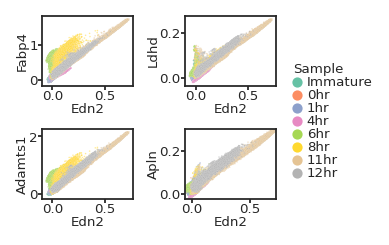

In [23]:
sc.settings.set_figure_params(dpi=80, dpi_save = 300, fontsize=6, facecolor='white', frameon=False, figsize=(1.0, 1.0), vector_friendly = True, transparent=True, format="pdf")
sns.set_style("ticks")
fig, axs = plt.subplots(2,2, figsize = (1.8,1.5))
axs = axs.flatten()
x_gene = "Edn2"
y_gene_list = dremi_df["gene"][1:5]
for i, y_gene in enumerate(y_gene_list):
    print(i, y_gene)
    sns.scatterplot(adata_magic.loc[adata_ovary_combined.obs_names], x="Edn2", y = y_gene, hue = "Sample", palette="Set2", ax=axs[i], 
                    s = 0.5, alpha = 0.5, linewidths = 0.0)
    if i == 0:
        handles, labels = axs[i].get_legend_handles_labels()
        legend = axs[i].get_legend()
    axs[i].get_legend().remove()
    axs[i].tick_params(axis='both', which='major', pad=0, size = 2)
    axs[i].set_ylabel(y_gene, labelpad = 0.0)
    axs[i].set_xlabel(x_gene, labelpad = 0.0)
    
fig.legend(handles, labels, ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, title = "Sample",
           labelspacing = 0.0, frameon = False,  title_fontsize = 6, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5))     
# fig.delaxes(axs[0])
plt.margins(x=0, y=0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig("./figures/edn2_dremi_coor.png", dpi = 300)

0 Fabp4
1 Ldhd
2 Adamts1
3 Apln


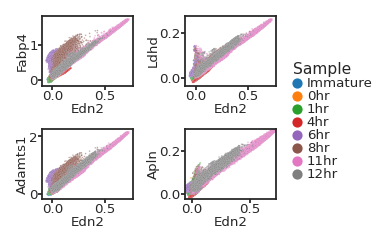

In [317]:
sc.settings.set_figure_params(dpi=80, dpi_save = 300, fontsize=6, facecolor='white', frameon=False, figsize=(1.0, 1.0), vector_friendly = True, transparent=True, format="pdf")
sns.set_style("ticks")
fig, axs = plt.subplots(2,2, figsize = (1.8,1.5))
axs = axs.flatten()
x_gene = "Edn2"
y_gene_list = dremi_df["gene"][1:5]
for i, y_gene in enumerate(y_gene_list):
    print(i, y_gene)
    sns.scatterplot(adata_magic.loc[adata_ovary_combined.obs_names], x="Edn2", y = y_gene, hue = "Sample", palette="tab10", ax=axs[i], 
                    s = 0.5, alpha = 0.5, linewidths = 0.0)
    if i == 0:
        handles, labels = axs[i].get_legend_handles_labels()
        legend = axs[i].get_legend()
    axs[i].get_legend().remove()
    axs[i].tick_params(axis='both', which='major', pad=0, size = 2)
    axs[i].set_ylabel(y_gene, labelpad = 0.0)
    axs[i].set_xlabel(x_gene, labelpad = 0.0)
    
fig.legend(handles, labels, ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, title = "Sample",
           labelspacing = 0.0, frameon = False,  title_fontsize = 7, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5))     
# fig.delaxes(axs[0])
plt.margins(x=0, y=0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig("./figures/edn2_dremi_coor.png", dpi = 300)

In [2]:
sc.settings.set_figure_params(dpi=80, dpi_save = 300, fontsize=6, facecolor='white', frameon=False, figsize=(1.0, 1.0), vector_friendly = True, transparent=True, format="pdf")
sns.set_style("ticks")
fig, axs = plt.subplots(2,2, figsize = (1.8,1.5))
axs = axs.flatten()
x_gene = "Edn2"
y_gene_list = dremi_df["gene"][1:5]
for i, y_gene in enumerate(y_gene_list):
    print(i, y_gene)
    sns.boxplot(adata_magic.loc[adata_ovary_combined.obs_names], x="Edn2", y = y_gene, hue = "Sample", palette="tab10", ax=axs[i], 
                    s = 0.5, alpha = 0.5, linewidths = 0.0)
    if i == 0:
        handles, labels = axs[i].get_legend_handles_labels()
        legend = axs[i].get_legend()
    axs[i].get_legend().remove()
    axs[i].tick_params(axis='both', which='major', pad=0, size = 2)
    axs[i].set_ylabel(y_gene, labelpad = 0.0)
    axs[i].set_xlabel(x_gene, labelpad = 0.0)
    
fig.legend(handles, labels, ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, title = "Sample",
           labelspacing = 0.0, frameon = False,  title_fontsize = 7, alignment = "left", 
           borderpad = 0.1, borderaxespad = 0.1, loc = 6, bbox_to_anchor = (1.0, 0.5))     
# fig.delaxes(axs[0])
plt.margins(x=0, y=0)
plt.subplots_adjust(wspace=0, hspace=0)
plt.tight_layout()
plt.savefig("./figures/edn2_dremi_coor_box.png", dpi = 300)

NameError: name 'sc' is not defined